# WeatherPy


# Data Analysis:

1) From the initial scatter plots, it is noticeable that there is a lot of discrepancy in all the categories measured. In all of the plots there is a large range in the data points comparing the different measureables of each city location. This is understandable as different cities will have different temperatures, cloudiness, humidity and wind speed depending on the location. Furthermore, measuring the data on one day alone instead of over time could contribute to higher variance in the data.

2) It is observable from the data and plots that most of the regressions explain little of the variance in the data. This is understandable as cloudiness, wind speed, temperature, and humidity all vary from day to day, seasonally, and climate to climate. In order to have regressions that explain more of the variance, more data points would be neccessary measuring all these factors over more than just one day.

3) The max temperature vs city latitude, both for the northern and southern hemispheres were the scatter plots with the best fitting regressions. This understandable as temperatures do vary during the time of day and from day to day, however, there is a general trend of temperatures in relation to latitude. Generally, the closer to the equator a city is, the temperature tends to be higher and the further the city is from the equator, the temperature tends to be lower. So while there is variance in this data set, this relationship has the strongest correlation of those measured.


In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed, skip cities not found


In [30]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key 
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=9d88a4e32284086ca01a89386c890bf8'

In [31]:
# set up lists to hold reponse info
city_names = []
longitudes = []
latitudes = []
max_temps = []
humidities = []
cloudiness1 = []
wind_speeds = []
countries = []
dates = []
count = 0

print(f"Beginning Data Retrieval: \n")
print(f"------------------------\n" )
# Loop through the list of cities and perform a request for data on each

for city in cities:
    city_url = query_url + "&q=" + city + "&units=imperial"
    count += 1 
# Get weather data
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()

# Try to grab the city name and id if they are available in the weather API
    try:
        
        city_name = weather_json['name']
        longitude = weather_json['coord']['lon']
        latitude = weather_json['coord']['lat']
        max_temp = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloudiness = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        
        
        city_names.append(city_name)
        longitudes.append(longitude)
        latitudes.append(latitude)
        max_temps.append(max_temp)
        humidities.append(humidity)
        cloudiness1.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
        dates.append(date)
        

        print(f"Processing Record {count} | {city_name}")
        
# Handle exceptions for a city that is not available in the weather API
    except:
        # Append null values
        print(f"City not found. Skipping...")
        pass
 

Beginning Data Retrieval: 

------------------------

Processing Record 1 | Bantry
Processing Record 2 | Geraldton
Processing Record 3 | Bilibino
Processing Record 4 | Belinsky
Processing Record 5 | Druzhba
Processing Record 6 | Hearst
Processing Record 7 | Port Alfred
Processing Record 8 | Busselton
Processing Record 9 | Chokurdakh
Processing Record 10 | Craig
Processing Record 11 | Nālūt
Processing Record 12 | Sovetsk
Processing Record 13 | Henties Bay
Processing Record 14 | Upernavik
Processing Record 15 | Ahipara
Processing Record 16 | Marsh Harbour
City not found. Skipping...
Processing Record 18 | Khandyga
Processing Record 19 | Pisco
Processing Record 20 | Mataura
Processing Record 21 | Cape Town
Processing Record 22 | Jacksonville
Processing Record 23 | Qaqortoq
Processing Record 24 | Tuktoyaktuk
Processing Record 25 | Atuona
Processing Record 26 | Itarema
Processing Record 27 | Aktau
Processing Record 28 | Rikitea
Processing Record 29 | Margate
Processing Record 30 | Hermanus


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame 
weather_dict = {
    "City": city_names,
    "Latitude": latitudes,
    "Longitude": longitudes,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudiness1,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,69.80,49,40,13.87,CA,1595177717
1,Norman Wells,65.28,-126.83,53.60,87,75,6.93,CA,1595178290
2,Vao,-22.67,167.48,69.21,74,3,15.68,NC,1595178290
3,Santa Branca,-23.40,-45.88,75.20,44,0,3.36,BR,1595178290
4,Bluff,-46.60,168.33,39.00,83,100,3.00,NZ,1595177711
...,...,...,...,...,...,...,...,...,...
558,Tam Ky,15.57,108.48,82.40,78,20,4.70,VN,1595178363
559,Tal'menka,53.82,83.57,68.00,42,50,6.71,RU,1595178363
560,Romny,50.75,33.47,68.47,70,80,2.15,UA,1595178363
561,Riyadh,24.69,46.72,104.00,16,78,6.93,SA,1595178098


In [6]:
# export to csv
weather_data.to_csv (r'C:\Users\cdfen\Documents\Python-API-Challenge\Weatherpy\weatherdf.csv', index = False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.


In [7]:
# create a dataframe to see if there are any humidity values over 100
humidity_100plus = weather_data.loc[weather_data["Humidity"] > 100]
humidity_100plus

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# No values of humidity are over 100
# no need to create a new 'clean' dataframe, can utilize weather_data above and already exported csv file

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs. Latitude Plot

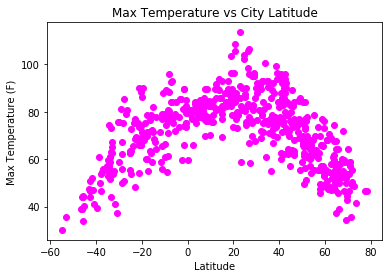

In [37]:
# Create a Scatter Plot for temperature vs latitude 
x_values = weather_data['Latitude']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, color='magenta')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature vs City Latitude')
plt.savefig('temp_vs_lat')
plt.show()


Analysis:
In this plot the code is analyzing the relationship between the max temperature (F) and the city latitude. From the graph it can be seen that as city latitudes approach 0, the max temperature is tends to increase. This is understandable as the equator is located at 0 degrees latitude.


## Humidity vs. Latitude Plot

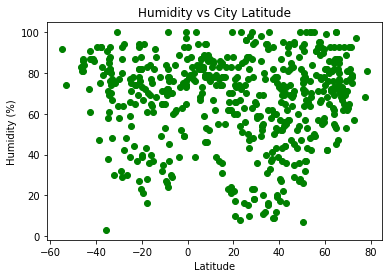

In [38]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, color='g')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs City Latitude')
plt.savefig('humidity_vs_lat')
plt.show()

Analysis:
In this plot the code is analyzing the relationship between the humidity (%) and the city latitude. From this scatter plot, it is noticeable that there is high humidity across the entirity of the city latitude range. It would make sense that there are fewer lower humidity points at and around the latitude of zero as that is near or at the equator which tends to have high humidity. The variation in high and low humidity points accross the latitudes suggests there is a large range of varying climates across these collected latitudes. 

## Cloudiness vs. Latitude Plot

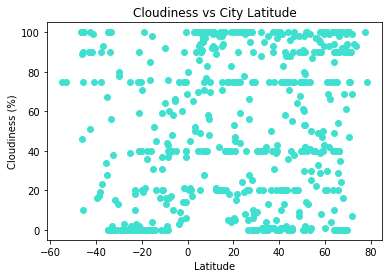

In [39]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, color='turquoise')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs City Latitude')
plt.savefig('cloudiness_vs_lat')
plt.show()

Analysis:
In this scatter plot the code is analyzing the relationship between the cloudiness (%) and the city latitude. It is observable that there is a wide range of cloudiness percentages across all the city latitudes. This could be explained by the fact that cloudiness level varries on a day to day basis and to see a larger pattern cloudiness would need to be measured over a period of time rather than on a singular day.

## Wind Speed vs. Latitude Plot

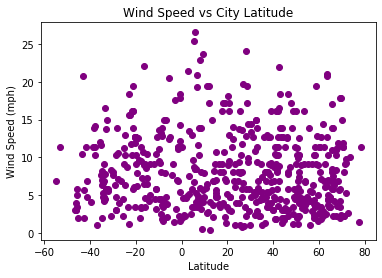

In [40]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, color='purple')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed vs City Latitude')
plt.savefig('wind_speed_vs_lat')
plt.show()

Analysis:
In this scatter plot the code is analyzing the relationship between the wind speed (mph) and the city latitude. From the plot it can be noticed that while there is a range of wind speeds at each latitude point, the higher wind speeds tend to be further from the 0 latitude. In this particular set of data the highest wind speeds look to be at -38 latitude. This is understandable as the higher latitudes are closer to the North and South Poles which tend to have inclement weather. 

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
N_hem = weather_data.loc[weather_data["Latitude"] > 0]
S_hem = weather_data.loc[weather_data["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4832503129723867


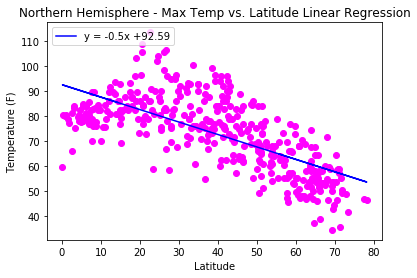

In [42]:
x_val = N_hem['Latitude']
y_val = N_hem['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# Get regression values
regress_values = x_val * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_val,y_val, color = 'magenta')
plt.plot(x_val,regress_values,"r-", color = 'b', label = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.legend(loc="upper left")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# save as png
plt.savefig('nhem_temp_v_lat')
# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5763895260098979


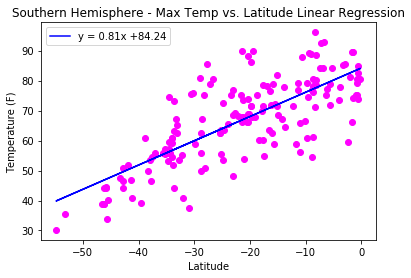

In [43]:
x_val = S_hem['Latitude']
y_val = S_hem['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# Get regression values
regress_values = x_val * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_val,y_val, color = 'magenta')
plt.plot(x_val,regress_values,"r-", color = 'b', label = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.legend(loc="upper left")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# save as png
plt.savefig('shem_temp_v_lat')

# Show plot
plt.show()

Analysis: In the above two scatter plots, the linear regression analyzes the relationship between the max temperature of a city (F) and the city latitude. Both regressions have a r squared value of around 50%, meaning that both regressions explain around 50% of the variance. This is understandable as temperature varries day to day and time of year. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0019427362505166474


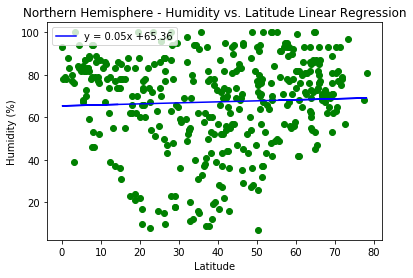

In [44]:
x_val = N_hem['Latitude']
y_val = N_hem['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# Get regression values
regress_values = x_val * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_val,y_val, color = 'g')
plt.plot(x_val,regress_values,"r-", color = 'b', label = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(loc="upper left")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# save as png
plt.savefig('nhem_humidity_v_lat')

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03929263391048692


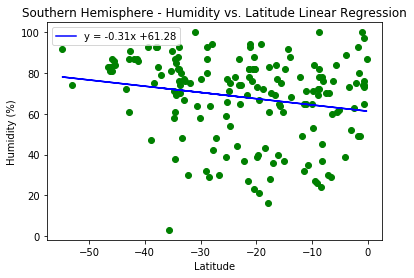

In [45]:
x_val = S_hem['Latitude']
y_val = S_hem['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# Get regression values
regress_values = x_val * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_val,y_val, color = 'g')
plt.plot(x_val,regress_values,"r-", color = 'b', label = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(loc="upper left")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# save as png
plt.savefig('shem_humidity_v_lat')

# Show plot
plt.show()

Analysis: In the above two green scatter plots, the linear regressions analyze the relationship between the humidity of a city (%) and the city latitude. In both cases, the r squared value is extremely low, under 4%. This indicates that both regressions explain vary little of the variance. This is understandable as there are a vast range of climates to be considered and that humidity varries day to day and time of year. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 2.081095119779275e-05


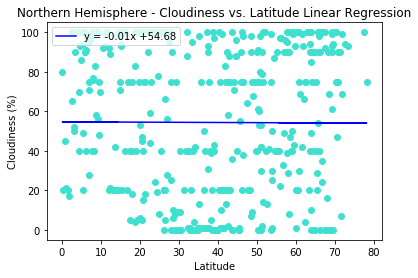

In [46]:
x_val = N_hem['Latitude']
y_val = N_hem['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# Get regression values
regress_values = x_val * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_val,y_val, color = 'turquoise')
plt.plot(x_val,regress_values,"r-", color = 'b', label = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(loc="upper left")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# save as png
plt.savefig('nhem_cloud_v_lat')

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.019689273351149374


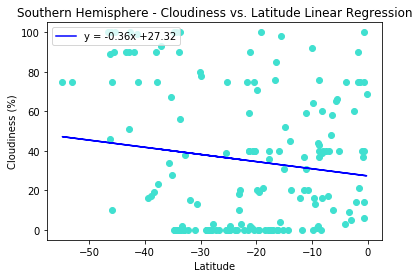

In [47]:
x_val = S_hem['Latitude']
y_val = S_hem['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# Get regression values
regress_values = x_val * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_val,y_val, color = 'turquoise')
plt.plot(x_val,regress_values,"r-", color = 'b', label = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(loc="upper left")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# save as png
plt.savefig('shem_cloud_v_lat')

# Show plot
plt.show()

Analysis: In the teal scatter plots, the linear regressions analyze the relationship between the cloudiness of a city (%) and the city latitude. In both regressions the r-squared value again indicates that very little of the variance is explained. This can be attributed to the fact that the data was taken on a singular day and that there is variance in cloudiness levels throughout the time of day, day to day and during a particular time of year. For a clearer picture more data across multpile days would need to be compiled.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008205152329026848


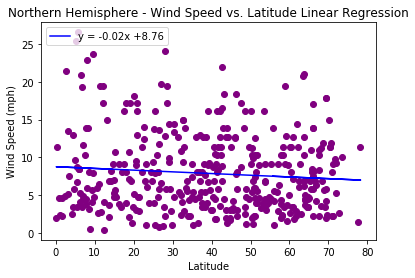

In [48]:
x_val = N_hem['Latitude']
y_val = N_hem['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# Get regression values
regress_values = x_val * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_val,y_val, color = 'purple')
plt.plot(x_val,regress_values,"r-", color = 'b', label = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend(loc="upper left")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# save as png
plt.savefig('nhem_wind_v_lat')

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011785274808022666


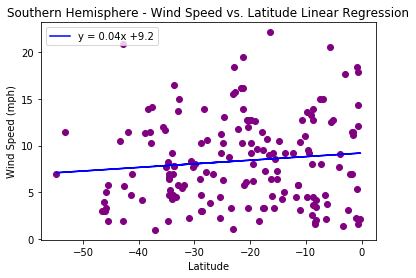

In [49]:
x_val = S_hem['Latitude']
y_val = S_hem['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# Get regression values
regress_values = x_val * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_val,y_val, color = 'purple')
plt.plot(x_val,regress_values,"r-", color = 'b', label = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend(loc="upper left")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# save as png
plt.savefig('shem_wind_v_lat')

# Show plot
plt.show()

Analysis:
In the final two scatter plots (purple), the linear regressions analyze the relationship between the wind speed of a city (mph) and the city latitude. In both regressions the r-squared values are low. In both cases very little of the variance is explained. This could be attributed to the fact that wind speeds change frequently from the time during the day, climate, the date measured and even the time of year.